In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from pandasql import sqldf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

LECTURA DE LA CAPA BRONZE

In [3]:
df = pd.read_csv("C:/Users/varit/Desktop/DATAB/BRONZE/Fact_Air_BNB.csv", sep = ';')

## 1. Definir Data Set
### El dataset escogido es éste, scrapeado de Airbnb. Vuestra primera misión será
familiarizaros con lo que ahí se recoge.

In [5]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## 2. Arquitectura y validación de los datos
### a. Muestreo y exploración inicial de los datos

In [6]:
df.ID.count()

14780

In [7]:
cols = ['ID','ListingUrl','ScrapeID','LastScraped','Name','Summary',
'Space','Description','ExperiencesOffered','NeighborhoodOverview',
'Notes','Transit','Access','Interaction','HouseRules',
'ThumbnailUrl','MediumUrl','PictureUrl','XLPictureUrl',
'HostID','HostURL','HostName','HostSince','HostLocation',
'HostAbout','HostResponseTime','HostResponseRate',
'HostAcceptanceRate','HostThumbnailUrl','HostPictureUrl',
'HostNeighbourhood','HostListingsCount',
'HostTotalListingsCount','HostVerifications','Street',
'Neighbourhood','NeighbourhoodCleansed',
'NeighbourhoodGroupCleansed','City','State','Zipcode','Market',
'SmartLocation','CountryCode','Country','Latitude','Longitude',
'PropertyType','RoomType','Accommodates','Bathrooms','Bedrooms',
'Beds','BedType','Amenities','SquareFeet','Price','WeeklyPrice',
'MonthlyPrice','SecurityDeposit','CleaningFee','GuestsIncluded',
'ExtraPeople','MinimumNights','MaximumNights','CalendarUpdated',
'HasAvailability','Availability30','Availability60',
'Availability90','Availability365','CalendarlastScraped',
'NumberofReviews','FirstReview','LastReview',
'ReviewScoresRating','ReviewScoresAccuracy',
'ReviewScoresCleanliness','ReviewScoresCheckin',
'ReviewScoresCommunication','ReviewScoresLocation',
'ReviewScoresValue','License','JurisdictionNames',
'CancellationPolicy','Calculatedhostlistingscount',
'ReviewsperMonth','Geolocation','Features']
df.columns = cols

In [8]:
df.columns=cols

In [9]:
print("hay", len(df.City.unique()), "ciudades diferentes")

hay 247 ciudades diferentes


In [10]:
df_select=df[["ID","Description","Name","Space",'City','State',"Country",'Bathrooms','Bedrooms','SquareFeet','Price','WeeklyPrice',
'MonthlyPrice','NumberofReviews',"ReviewScoresRating",'ReviewScoresAccuracy',
'ReviewScoresCleanliness','ReviewScoresCheckin',
'ReviewScoresCommunication','ReviewScoresLocation',
'ReviewScoresValue','CancellationPolicy','Geolocation']]

In [11]:
df_select

,ID,Description,Name,Space,City,State,Country,Bathrooms,Bedrooms,SquareFeet,...,NumberofReviews,ReviewScoresRating,ReviewScoresAccuracy,ReviewScoresCleanliness,ReviewScoresCheckin,ReviewScoresCommunication,ReviewScoresLocation,ReviewScoresValue,CancellationPolicy,Geolocation
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",Panoramic charming studio!,It's a bright and cosy studio located in the h...,Madrid,Comunidad de Madrid,Spain,1.0,0.0,NaN,...,30,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,"40.40745268477803, -3.7079954754432634"
1,9470166,"In the center, recently remodeled, comfortable...",Comfortable penthouse in the center,Quiet and comfortable space where you can rela...,Madrid,Comunidad de Madrid,Spain,1.0,1.0,NaN,...,97,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,"40.40831556101927, -3.705006385704201"
2,17444981,Nice apartment near Sol and La Latina. Perfect...,Cosy Apartment SOL/LA LATINA,Is a really cosy apartment with the best locat...,Madrid,Comunidad de Madrid,Spain,1.5,1.0,NaN,...,7,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,"40.413722014584295, -3.7068231186536718"
3,3284565,"Alquilo estudio en el centro de Madrid , total...",Alquiler Estudio Nuevo Madrid,NaN,Madrid,Community of Madrid,Spain,1.0,1.0,NaN,...,6,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,"40.411263372718054, -3.6973054373712886"
4,499911,Bright and airy apartment in Central Madrid re...,2 bedroom apartment downtown Madrid,Bright and airy apartment in Central Madrid re...,Madrid,Comunidad de Madrid,Spain,1.0,2.0,NaN,...,72,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,"40.41255625665078, -3.701155364799422"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,15694640,My place is close to Sagrada Familia. You’ll l...,Cozy & Quiet Room near Sagrada Familia,The apartment is spacious with a big bathroom ...,Barcelona,Catalonia,Spain,1.5,1.0,NaN,...,15,97.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,"41.3993357950806, 2.178007212000945"
14776,17475363,Apreciados huespedes! si has llegado hasta aqu...,PASEO DE GRACIA NEW HOME DESING - LA PEDRERA - J,Disfruta de un apartamento ubicado en uno de l...,Barcelona,Catalunya,Spain,1.0,2.0,NaN,...,4,100.0,9.0,10.0,9.0,9.0,9.0,9.0,flexible,"41.39465435237872, 2.1625016321279538"
14777,17584727,"This apartment has: 2 double beds, 1 double so...","Plaza Catalunya IV Apart., Friendly Rentals","This apartment has: 2 double beds, 1 double so...",Barcelona,Barcelona,Spain,2.0,2.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,"41.388179279378136, 2.1714668704754914"
14778,6453584,you will find yourself in the middle of Berlin...,NICE NICE VERY NICE : ),NaN,Berlin,Berlin,Germany,1.0,1.0,NaN,...,5,92.0,9.0,10.0,10.0,10.0,10.0,10.0,moderate,"52.5277599586111, 13.395542104209248"


## 2. Arquitectura y validación de los datos
#### b. Definir e implementar el Datawarehouse

La arquitectura que vamos a simular es la de un proyecto en la nube de Azure, ya que estamos utilizando PBI para representar los datos usaremos toda la infra de Azure.
Lo simularemos de la siguiente manera:

#### 1)Azure Datalake, lo usaremos como Datawarehouse. Lo vamos a simular con rutas en locas de las diferentes capas (Bronze, Silver, Gold) guardando nuestros datos en formato CSV.


#### 2)Azure DataBricks, Simularemos que estamos trabajando a traves de spark en lenguaje python y sql con diferentes libreria como pandas y numpy. Lo vamos a simular usando jupyter Notebook.

#### 3)Azure Datafactory, usariamos esta plataforma para programar un trigger con la frecuencia requerida por AIRBNB para que se ejecute nuestro código

#### 4)PBI que conectaría a nuestro datalake, en este caso va a conectar con nuestra capa GOLD y SILVER para leer los datos ya procesados y representar los KPIs requeridos por el cliente



Nos encontramos ante un Dataset único, dado que vamos a realizar un trabajo de visualizacion final en PBI, realizaremos un modelo en estrella con dimensiones y una tabla de hechos.

Tras realizar una primera inspección de los datos decidimos montar nuestro modelo en 3 capas de datos (Bronce: donde vamos a guardar la informacion en RAW extraida del enlace proporcionado, Silver: Guardamos las dimensiones y nuestra tabla de hechos, Gold: gardamos la tabla de hechos transformada para que se una a las dimensiones)

Vamos a fuardar estas 3 capas en local en formato CSV
Modelo en imagen adjunta



## 3. Análisis Exploratorio
Hacer un estudio estadístico con R o Python, según preferencia personal, y averiguar
cuales son las métricas adecuadas para el dataset. No olvidemos:
### a. Revisión de la calidad de los datos
### b. Detección outliers (rango de variables), imputación valores nulos.


SE ANALIZAN LOS NULOS

In [12]:
df_select.isnull().sum()

ID                               0
Description                      6
Name                             1
Space                         3892
City                             6
State                          144
Country                          1
Bathrooms                       55
Bedrooms                        25
SquareFeet                   14182
Price                           17
WeeklyPrice                  11190
MonthlyPrice                 11219
NumberofReviews                  0
ReviewScoresRating            3304
ReviewScoresAccuracy          3326
ReviewScoresCleanliness       3320
ReviewScoresCheckin           3337
ReviewScoresCommunication     3320
ReviewScoresLocation          3340
ReviewScoresValue             3341
CancellationPolicy               0
Geolocation                      0
dtype: int64

SE ANALIZAN LOS OUTLIERS DE PRECIO POR HABITACION

In [13]:
df_select["Price"].mean()

73.56147124568177

In [14]:
x=df_select["Price"].values
y=df_select["Bedrooms"].values

### c. Boxplots, histogramas, etc.

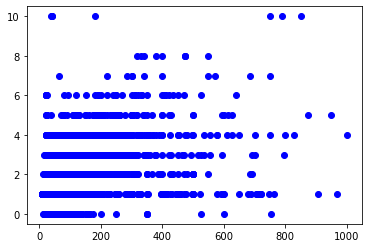

In [15]:
plt.plot(x,y,'o', color='blue')

SE DETECTAN ALGUNOS OUTLIERS, COMO SE PUEDE OBSERVAR HAY APARTAMENTOS QUE TIENEN UNA HABITACION Y CUESTAN ALREDEDOR DE 1000€
POR OTRO LADO SE DETECTAN APARTAMENTOS DE MUCHAS HABITACIONES Y SU PRECIO ES MENOR DE 100€

In [16]:
df_select[(df_select["Price"]>700)& (df_select["Bedrooms"]<3)]

,ID,Description,Name,Space,City,State,Country,Bathrooms,Bedrooms,SquareFeet,...,NumberofReviews,ReviewScoresRating,ReviewScoresAccuracy,ReviewScoresCleanliness,ReviewScoresCheckin,ReviewScoresCommunication,ReviewScoresLocation,ReviewScoresValue,CancellationPolicy,Geolocation
1568,13787891,"Situated in the heart of Soho/Central, this mo...",Modern 1BR APT in the heart of SOHO/Central,"Situated in the heart of Soho/Central, this mo...",Hong Kong,Hong Kong Island,Hong Kong,1.0,1.0,NaN,...,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,"22.284098017802478, 114.1512374448225"
3185,2905934,Four room apartment in two levels. One room is...,New York in Copenhagen,I am an published author and artist. There are...,Copenhagen,NaN,Denmark,1.0,1.0,NaN,...,4,90.0,9.0,9.0,10.0,10.0,10.0,10.0,strict,"55.6690690318719, 12.554167467906158"
5957,17836985,"Hisense refrigerator, GREE air conditioning, M...",Can cook Online,NaN,马德里,马德里自治区,Spain,1.0,1.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.45228018282359, -3.7079617687098314"
6061,13016153,You'll love my place because of the very centr...,PERFECT LOCATION - Spacious apartment with bal...,"The size of the apartment is 84 m2, it has hig...",Frederiksberg C,Copenhagen,Denmark,1.0,1.0,NaN,...,35,99.0,10.0,10.0,10.0,10.0,9.0,9.0,strict,"55.68399885970772, 12.540060917507981"
6410,17839736,"Hisense refrigerator, GREE air conditioning, M...",Can cook Online,NaN,马德里,马德里自治区,Spain,1.0,1.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.49191286177166, -3.6893447752649298"
7584,8867570,Prime location! A peaceful sanctuary located i...,"Sheung Wan Poho, expat's dream pad",This 300 sq.ft. (useable area) studio is well-...,Hong Kong,Hong Kong Island,Hong Kong,1.0,0.0,NaN,...,6,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,"22.28482365223847, 114.14806209289685"
7588,19109692,"The apartment is newly renovated, large and su...",Cosy Apartment with Balcony. 3 min from City B...,The apartment is located in the heart of Islan...,København,Danmark,Denmark,1.0,1.0,NaN,...,2,100.0,10.0,10.0,9.0,10.0,10.0,9.0,moderate,"55.6648943445264, 12.58271494071293"
7919,17605002,Shanghai is located in the typical small alley...,Elegant Republic,Modification of the new neighborhood old villa...,马德里,马德里自治区,Spain,1.0,1.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.44928752293238, -3.7324266178771297"
9499,17605703,Independent of the quality of all the houses a...,The air garden room,"The house has high power ion hair dryer, washi...",马德里,马德里自治区,Spain,1.0,1.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.48244280506616, -3.7214940131572645"
9524,17844300,"Hisense refrigerator, GREE air conditioning, M...",Can cook Online,NaN,马德里,马德里自治区,Spain,1.0,1.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.458458562017654, -3.781248122851804"


In [17]:
df_select[(df_select["Price"]<100)& (df_select["Bedrooms"]>9)]

,ID,Description,Name,Space,City,State,Country,Bathrooms,Bedrooms,SquareFeet,...,NumberofReviews,ReviewScoresRating,ReviewScoresAccuracy,ReviewScoresCleanliness,ReviewScoresCheckin,ReviewScoresCommunication,ReviewScoresLocation,ReviewScoresValue,CancellationPolicy,Geolocation
4844,13303778,Mi alojamiento es bueno para estudiantes de gr...,"B&B Nuevo en el centro de Madrid. Wifi, metro ,aa",En el centro de Madrid. Una residencia de estu...,Madrid,Comunidad de Madrid,Spain,6.0,10.0,NaN,...,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,"40.43430341911028, -3.71600544371333"
5407,11655788,Habitación en Residencia de estudiantes situad...,Residencia de estudiantes céntrica,"Situada en una de las mejores zonas de Madrid,...",Madrid,Comunidad de Madrid,Spain,0.0,10.0,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,"40.430685936233104, -3.7208958739766644"
6799,16388405,"Habitación individual, nueva y muy limpia. Cam...",Habitación ideal estudiantes femeninos,Estudiantes femeninas,Madrid,Comunidad de Madrid,Spain,5.5,10.0,NaN,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,"40.43360331358347, -3.714609160379583"


DEBIDO A QUE NO TENEMOS INFORMACION AL RESPECTO, PODEMOS CONCLUIR QUE LOS OUTLIERS ENTRAN DENTRO DE LOS NORMAL, DEBIDO A QUE PUEDEN SER APARTAMENTOS DE ESTUDIANTES, Y LOS APARTAMENTOS MAS CAROS NO TENEMOS MAS INFORMACION Y POR LO TANTO NO PODEMOS DESCARTARLOS

### d.Normalización de los valores de las tablas (quitar tildes, “dobles espacios”, etc.)

In [18]:
cols=df_select.select_dtypes(include=[np.object]).columns

In [19]:
df_select[cols]=df_select[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8'))

In [20]:
df_select["Country"]=df_select["Country"].str.upper()
df_select["State"]=df_select["State"].str.upper()
df_select["City"]=df_select["City"].str.upper()

In [21]:
df_select["State_F"] = df_select['State'].fillna(df_select['City'])
df_select["City_F"] = df_select['City'].fillna(df_select['State'])

NOS ENCONTRAMOS MUCHOS NULOS Y MUCHOS VALORES EN DIFERENTES IDIOMAS QUE NO PODEMOS MAPEAR PORQUE NO TENEMOS UNA TABLA MAESTRA DE CIUDADES, ESTADOS Y PAISES CON SU IDIOMA CORRESPONDIENTE.
DE ESTA FORMA NOS ENCONTRAMOS DUPLICADOS POR EL TEMA DEL LENGUAJE QUE NO PODEMOS SOLVENTAR

TOMAMOS LA DECISION DE PONER LA CIUDAD COMO ESTADO EN CASO DE QUE EL ESTADO SEA NULO AL NO CUMPLIR LAS REGLAS DE LA NORMALIZACION DE LENGUAJE QUE HEMOS IMPUESTO

NOS ENCONTRAMOS DUPLICADOS PORQUE ALGUNOS DATOS ESTAN EN MAYUSCULA Y OTROS EN MINUSCULA, LO SOLUCIONAMOS CONVIRTIENDO TODO A MAYUSCULA

## 4. Visualización de las métricas, PBI
A partir de los datos de Airbnb, obtén los KPIs que puedan ser de relevancia y contesta
a través de un dashboard a una pregunta relevante que hagas sobre los datos.
a. a. Se valorará el diseño final del dashboard.
b. b. El uso de buenas prácticas.
c. c. El cálculo de KPIs adecuados y el uso de campos calculados avanzados.
d. d. El uso de vistas interactivas.

#### SE  CREA  UN  MODELO COMO HEMOS DESCRITO EN EL APARTADO 2B

In [22]:
q="""Select ROW_NUMBER() OVER(ORDER BY City, State, Country ASC) AS ID_Geography, City, State, Country from
(SELECT DISTINCT State_F as State, City_F as City, Country FROM df_select) a;"""
pysqldf = lambda q: sqldf(q, globals())
Dim_Geography = pysqldf(q)

INSERCION DE LOS DATOS EN LA CAPA SILVER

In [23]:
Dim_Geography.to_csv('C:/Users/varit/Desktop/DATAB/SILVER/Dim_Geography.csv',mode='w+', sep=';', index=False)
df_select.to_csv('C:/Users/varit/Desktop/DATAB/SILVER/Fact_Air_BNB.csv',mode='w+', sep=';', index=False)